In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

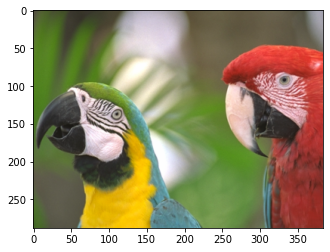

In [2]:
### Part1

# Read 'parrots.png' image
img = cv2.imread('parrots.png',cv2.IMREAD_COLOR)
# Change size of image(scale 0.5)
a = cv2.resize(img, (0, 0), fx=0.5, fy=0.5)
plt.imshow(cv2.cvtColor(a,cv2.COLOR_BGR2RGB))

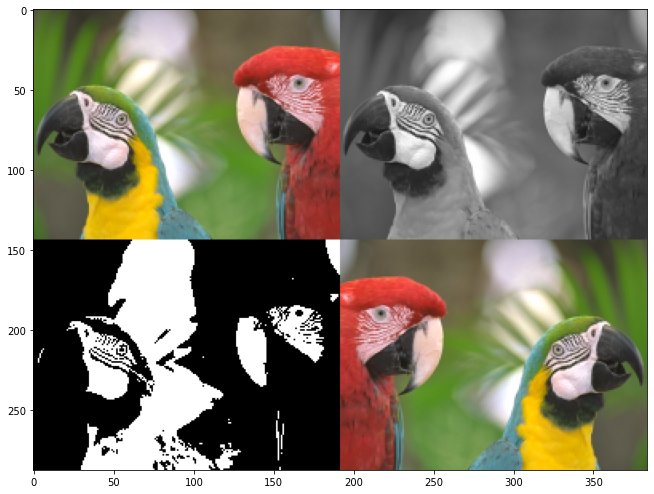

In [5]:
### Part2

# Change size of image(scale 0.5)
a1=cv2.resize(a, (0, 0), fx=0.5, fy=0.5)
# Make the grey scale image have one channel
grey = cv2.cvtColor(a1, cv2.COLOR_RGB2GRAY)
# Make the grey scale image have three channels
grey_3_channel = cv2.cvtColor(grey, cv2.COLOR_GRAY2BGR)
# Define a threshold, 128 is the middle of black and white in grey scale
thresh = 128
# Threshold the image
a1_binary = cv2.threshold(grey_3_channel, thresh, 255, cv2.THRESH_BINARY)[1]
# Horizontal mirror
a1_mirror=cv2.flip(a1,1)

# Stack 4 images
numpy_horizontal_part1 = np.hstack((a1, grey_3_channel))
numpy_horizontal_part2 = np.hstack((a1_binary, a1_mirror))
images=np.vstack((numpy_horizontal_part1,numpy_horizontal_part2))

plt.figure(figsize=(11,10))
plt.imshow(cv2.cvtColor(images,cv2.COLOR_BGR2RGB))

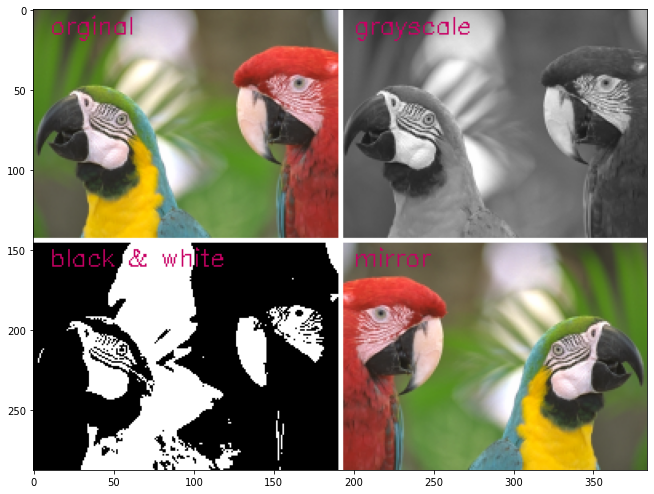

In [4]:
### Part3

# Draw two lines
cv2.line(images, (0,np.shape(images)[0]//2), (np.shape(images)[1],np.shape(images)[0]//2), (255,255,255), 2)
cv2.line(images, (np.shape(images)[1]//2,0), (np.shape(images)[1]//2,np.shape(images)[0]), (255,255,255), 2)

# Define positions of text(label of each image)
position1=(10,15)
position2=(200,15)
position3=(10,160)
position4=(200,160)

font_stroke=1
color=(100,0,200)
# Put label of images
cv2.putText(images,'orginal',position1,cv2.FONT_HERSHEY_SIMPLEX,0.5,color,font_stroke)
cv2.putText(images,'grayscale',position2,cv2.FONT_HERSHEY_SIMPLEX,0.5,color,font_stroke)
cv2.putText(images,'black & white',position3,cv2.FONT_HERSHEY_SIMPLEX,0.5,color,font_stroke)
cv2.putText(images,'mirror',position4,cv2.FONT_HERSHEY_SIMPLEX,0.5,color,font_stroke)
# Save image 
cv2.imwrite('Desktop/parrots_out.png', images)
plt.figure(figsize=(11,10))
plt.imshow(cv2.cvtColor(images,cv2.COLOR_BGR2RGB))